In [150]:
import pandas as pd
import base64
import numpy as np
from PIL import Image
import io
import cv2 as cv2
from io import BytesIO
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
clebs = pd.read_csv('images.tsv', delimiter="\t", engine='python', error_bad_lines=False)
print('Stats By Id')
clebs.groupby('Id').agg(['count']).describe()

Stats By Id


,Image
,count
count,27.000000
mean,111.259259
std,9.296784
min,86.000000
25%,106.500000
50%,114.000000
75%,116.500000
max,127.000000


In [151]:
def get_image(base64Image, display=True):
    img = Image.open(BytesIO(base64.b64decode(base64Image))).convert('RGB') 
    if display:
        plt.imshow(img)
    return img
#   to open image in new window
#   img.show()

def get_opencv2_image(base64Image):
    return cv2.cvtColor(np.array(get_image(base64Image)), cv2.COLOR_RGB2BGR)

def convertToRGB(opencv2_image):
    return cv2.cvtColor(opencv2_image, cv2.COLOR_BGR2RGB)

Sample Image


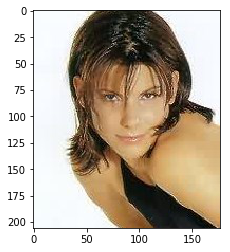

In [152]:
import random as rand
i = rand.randrange(0,len(clebs))
base64image = clebs.iloc[i]['Image']
get_image(base64image)
print("Sample Image")

In [153]:
def detect_faces(test_image, display=True, scaleFactor = 1.1):
    cascade = cv2.CascadeClassifier('./data/haarcascades/haarcascade_frontalface_default.xml')
    # create a copy of the image to prevent any changes to the original one.
    image_copy = test_image.copy()

    #convert the test image to gray scale as opencv face detector expects gray images
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)

    # Applying the haar classifier to detect faces
    faces_rect = cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors=5)

    for (x, y, w, h) in faces_rect:
        cv2.rectangle(image_copy, (x, y), (x+w, y+h), (0, 255, 0), 5)
    
    if display:
        plt.imshow(convertToRGB(faces))
    
    return image_copy

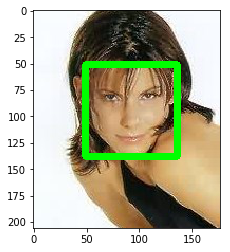

In [155]:
img_raw = get_opencv2_image(base64image)
faces = detect_faces(img_raw)